In [2]:
# Load & Clean the Placement Data
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\GLA\Batch_2022_2026.csv")

# Normalize 'Package (LPA)' field (pick highest if multiple)
def highest_package(row):
    p = str(row['Package (LPA)'])
    if ',' in p:
        p_list = [float(k.replace('`','')) for k in p.split(',') if k.replace('`','').replace('.','').isdigit()]
        return max(p_list) if p_list else np.nan
    if p.strip() == '' or p == 'nan':
        return np.nan
    if p.replace('`','').replace('.','').isdigit():
        return float(p.replace('`',''))
    return np.nan

df['Highest_Package'] = df.apply(highest_package, axis=1) / 1e5  # Convert from INR to LPA (assuming as per your data eg. `700000` = 7.0 LPA)

# Final list of placed students
df['Placed_bool'] = df['Placed'].apply(lambda x: x == 'Y')
df_placed = df[df['Placed_bool']]
df_unplaced = df[~df['Placed_bool']]


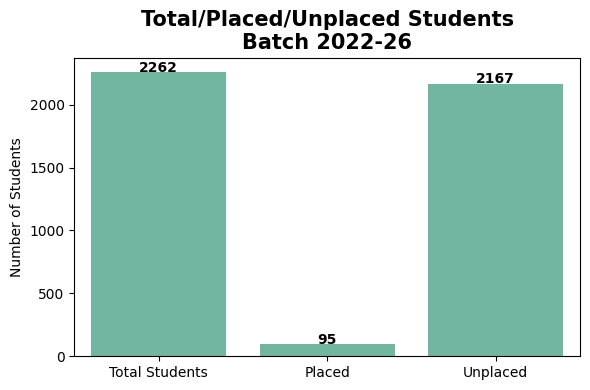

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

vals = [len(df), len(df_placed), len(df_unplaced)]
labs = ['Total Students', 'Placed', 'Unplaced']
sns.set_palette('Set2')
plt.figure(figsize=(6,4))
ax = sns.barplot(x=labs, y=vals)
for i, v in enumerate(vals):
    ax.text(i, v+2, str(v), ha='center', fontweight='bold')
plt.title("Total/Placed/Unplaced Students\nBatch 2022-26", fontsize=15, fontweight='bold')
plt.ylabel('Number of Students')
plt.xlabel('')
plt.tight_layout()
plt.show()


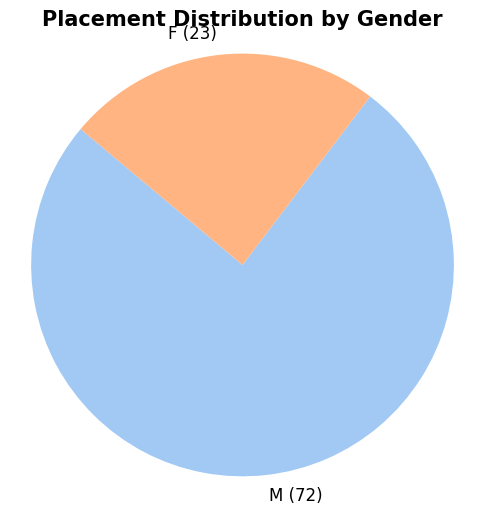

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
gender_counts = df_placed['Gender'].value_counts()
colors = sns.color_palette('pastel')

# Pie chart with counts as labels (not percent)
labels = [f"{gender} ({count})" for gender, count in zip(gender_counts.index, gender_counts.values)]

plt.pie(gender_counts, labels=labels, startangle=140, colors=colors, textprops={'fontsize':12})
plt.title('Placement Distribution by Gender', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\4206510229.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labs, y=vals, palette=['#27ae60','#2980b9'])


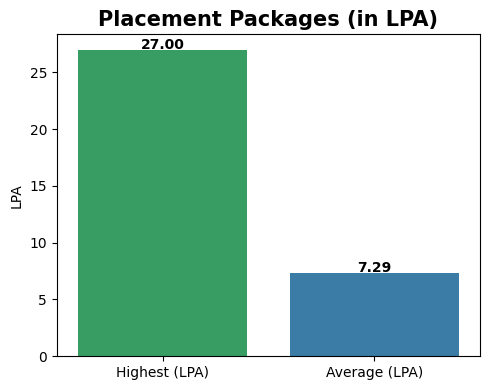

In [7]:
high_pkg = df_placed['Highest_Package'].max()
avg_pkg = df_placed['Highest_Package'].mean()

vals = [high_pkg, avg_pkg]
labs = ['Highest (LPA)', 'Average (LPA)']
plt.figure(figsize=(5,4))
ax = sns.barplot(x=labs, y=vals, palette=['#27ae60','#2980b9'])
for i,v in enumerate(vals):
    ax.text(i, v+0.1, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("Placement Packages (in LPA)", fontsize=15, fontweight='bold')
plt.ylabel("LPA")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\2968776828.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_placed_counts = df_placed.groupby(cpi_bins).size()


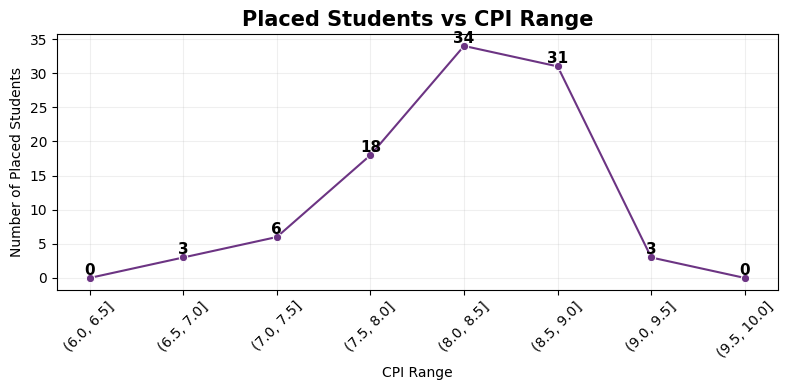

In [14]:
import numpy as np

cpi_bins = pd.cut(df_placed['CPI'], bins=np.arange(6,10.5,0.5))
cpi_placed_counts = df_placed.groupby(cpi_bins).size()

plt.figure(figsize=(8,4))
ax = sns.lineplot(x=[str(interval) for interval in cpi_placed_counts.index], y=cpi_placed_counts.values, marker='o', color='#6C3483')
plt.title('Placed Students vs CPI Range', fontsize=15, fontweight='bold')
plt.xlabel('CPI Range')
plt.ylabel('Number of Placed Students')
plt.xticks(rotation=45)
plt.grid(alpha=0.2)

# Add data labels on each point
for x, y in zip(range(len(cpi_placed_counts)), cpi_placed_counts.values):
    ax.text(x, y + 0.5, str(y), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\858655906.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_counts = df_placed.groupby('Last_Sem_Attendance_Bin').size().reindex(labels, fill_value=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\858655906.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attendance_counts.index, y=attendance_counts.values, palette="Blues_d")


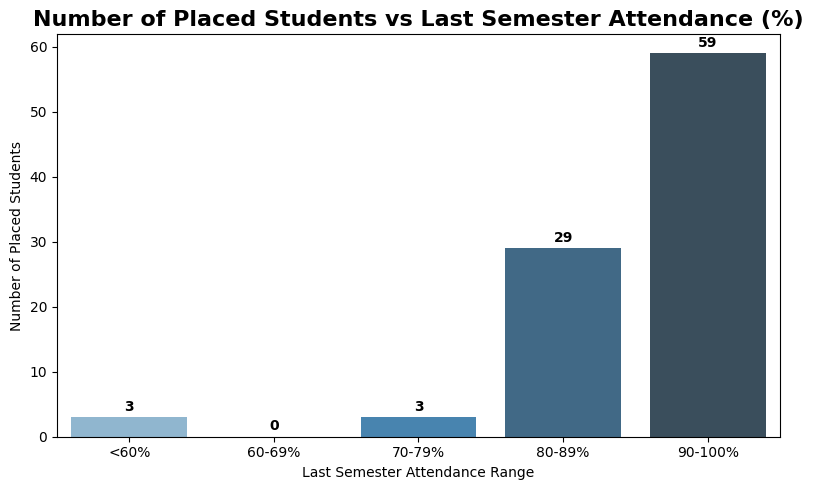

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Attendance bins banaen
bins = [0, 60, 70, 80, 90, 100]  # Aap chahe to adjust kar sakte hain
labels = ['<60%', '60-69%', '70-79%', '80-89%', '90-100%']

df_placed['Last_Sem_Attendance_Bin'] = pd.cut(df_placed['Last Semester Attendance %'], bins=bins, labels=labels, right=False)

# Har bin me placed students count karen
attendance_counts = df_placed.groupby('Last_Sem_Attendance_Bin').size().reindex(labels, fill_value=0)

plt.figure(figsize=(8,5))
sns.barplot(x=attendance_counts.index, y=attendance_counts.values, palette="Blues_d")
plt.title('Number of Placed Students vs Last Semester Attendance (%)', fontsize=16, fontweight='bold')
plt.xlabel('Last Semester Attendance Range')
plt.ylabel('Number of Placed Students')

# Data labels bar ke upar
for i, val in enumerate(attendance_counts.values):
    plt.text(i, val + 1, str(val), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\2835318241.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  immersion_counts = df_placed.groupby('Immersion_Attendance_Bin').size().reindex(labels_immersion, fill_value=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\2835318241.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=immersion_counts.index, y=immersion_counts.values, palette="Purples_d")


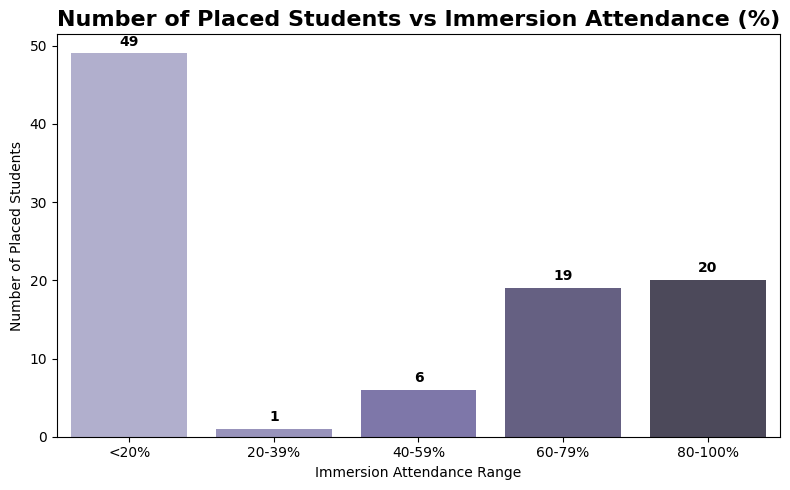

In [23]:
# Immersion attendance ke liye bhi bins banayen
bins_immersion = [0, 20, 40, 60, 80, 100]
labels_immersion = ['<20%', '20-39%', '40-59%', '60-79%', '80-100%']

df_placed['Immersion_Attendance_Bin'] = pd.cut(df_placed['Immersion Att. %'], bins=bins_immersion, labels=labels_immersion, right=False)

# Har bin me placed students count
immersion_counts = df_placed.groupby('Immersion_Attendance_Bin').size().reindex(labels_immersion, fill_value=0)

plt.figure(figsize=(8,5))
sns.barplot(x=immersion_counts.index, y=immersion_counts.values, palette="Purples_d")
plt.title('Number of Placed Students vs Immersion Attendance (%)', fontsize=16, fontweight='bold')
plt.xlabel('Immersion Attendance Range')
plt.ylabel('Number of Placed Students')

# Data labels bar ke upar
for i, val in enumerate(immersion_counts.values):
    plt.text(i, val + 1, str(val), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\1178681020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=lpa_distribution.index, y=lpa_distribution.values, palette='crest')


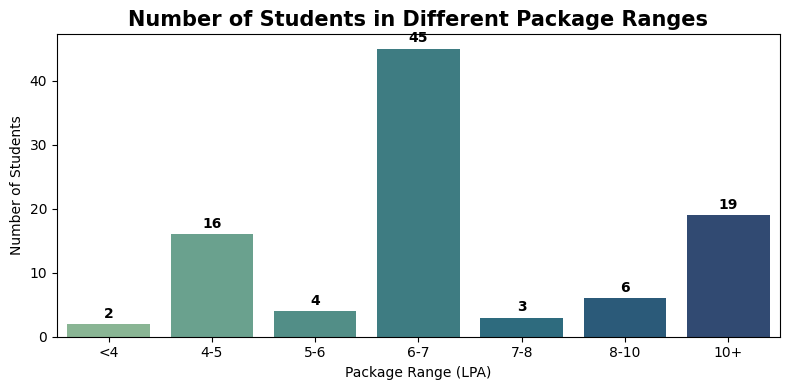

In [17]:
bins = [0, 4, 5, 6, 7, 8, 10, 100]
labels = ['<4', '4-5', '5-6', '6-7', '7-8', '8-10', '10+']
df_placed['LPA_Range'] = pd.cut(df_placed['Highest_Package'], bins=bins, labels=labels, right=False)
lpa_distribution = df_placed['LPA_Range'].value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(8,4))
ax = sns.barplot(x=lpa_distribution.index, y=lpa_distribution.values, palette='crest')
plt.title('Number of Students in Different Package Ranges', fontsize=15, fontweight='bold')
plt.xlabel('Package Range (LPA)')
plt.ylabel('Number of Students')

# Add data labels on top of bars
for i, val in enumerate(lpa_distribution.values):
    ax.text(i, val + 1, str(val), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3676\3921812237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_companies.index, x=top_companies.values, palette='mako')


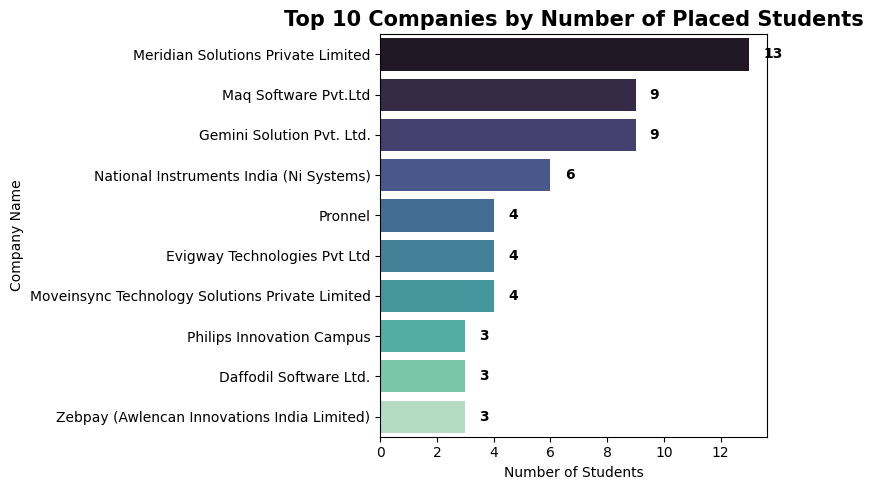

In [18]:
top_companies = df_placed['Company Name'].value_counts().head(10)

plt.figure(figsize=(8,5))
ax = sns.barplot(y=top_companies.index, x=top_companies.values, palette='mako')
plt.title('Top 10 Companies by Number of Placed Students', fontsize=15, fontweight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Company Name')

# Add exact count labels on bars
for i, val in enumerate(top_companies.values):
    ax.text(val + 0.5, i, str(val), va='center', fontweight='bold')

plt.tight_layout()
plt.show()
